# PCA Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Load data from Atlas

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    '3a1g_B'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/atlas'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='atlas')
analysis.generate_trajectories()

Download complete. Saved to: C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.zip
Downloaded file 3a1g_B.zip from Atlas.
Extracted directory C:\Users\nikol\Documents\test_dir\atlas.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R1_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R2_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R3_fit.top.pdb.
Analysing ensembles: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']
Trajectory already exists for ensemble 3a1g_B_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R3_fit. Loading trajectory.


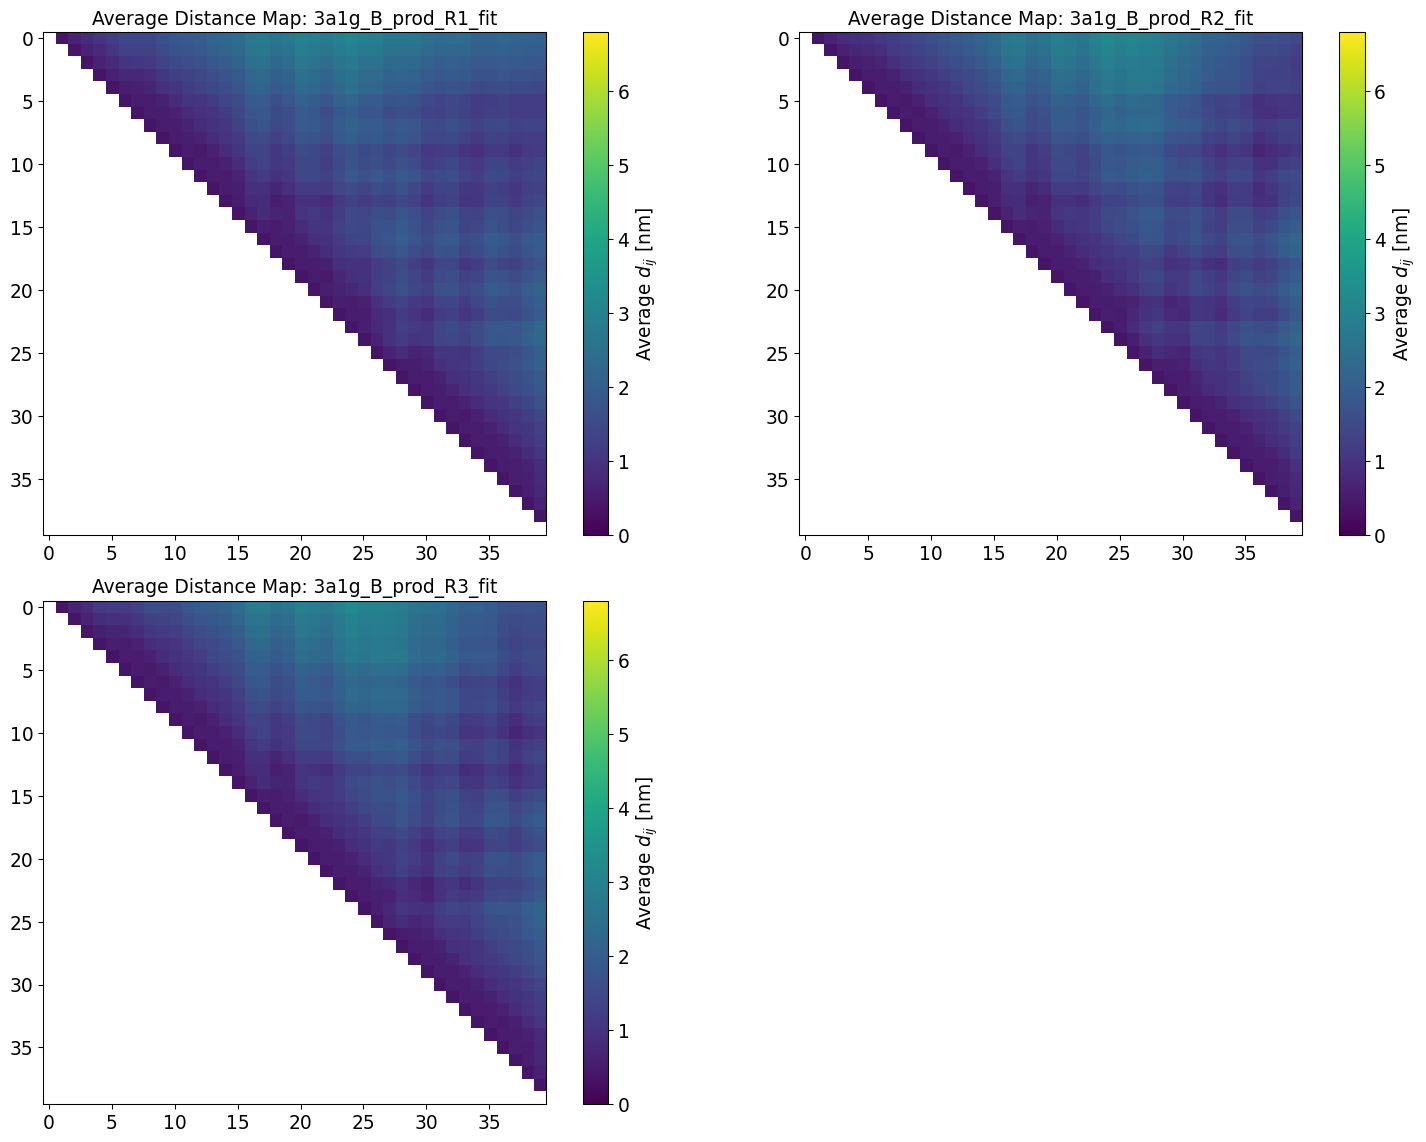

In [3]:
analysis.plot_average_dmap_comparison()

## Featurization

In [4]:
analysis.perform_feature_extraction(featurization='ca_dist', seq_sep=2, normalize=False)

Performing feature extraction for Ensemble: 3a1g_B_prod_R1_fit.
Transformed ensemble shape: (10001, 741)
Performing feature extraction for Ensemble: 3a1g_B_prod_R2_fit.
Transformed ensemble shape: (10001, 741)
Performing feature extraction for Ensemble: 3a1g_B_prod_R3_fit.
Transformed ensemble shape: (10001, 741)
Feature names: ['GLY1-SER3', 'GLY1-MET4', 'GLY1-GLU5', 'GLY1-ARG6', 'GLY1-ILE7', 'GLY1-LYS8', 'GLY1-GLU9', 'GLY1-LEU10', 'GLY1-ARG11', 'GLY1-ASN12', 'GLY1-LEU13', 'GLY1-MET14', 'GLY1-SER15', 'GLY1-GLN16', 'GLY1-SER17', 'GLY1-ARG18', 'GLY1-THR19', 'GLY1-ARG20', 'GLY1-GLU21', 'GLY1-ILE22', 'GLY1-LEU23', 'GLY1-THR24', 'GLY1-LYS25', 'GLY1-THR26', 'GLY1-THR27', 'GLY1-VAL28', 'GLY1-ASP29', 'GLY1-HIS30', 'GLY1-MET31', 'GLY1-ALA32', 'GLY1-ILE33', 'GLY1-ILE34', 'GLY1-LYS35', 'GLY1-LYS36', 'GLY1-TYR37', 'GLY1-THR38', 'GLY1-SER39', 'GLY1-GLY40', 'GLY2-MET4', 'GLY2-GLU5', 'GLY2-ARG6', 'GLY2-ILE7', 'GLY2-LYS8', 'GLY2-GLU9', 'GLY2-LEU10', 'GLY2-ARG11', 'GLY2-ASN12', 'GLY2-LEU13', 'GLY2-MET1

## Dimensionality Reduction

In [5]:
analysis.fit_dimensionality_reduction(method='pca', fit_on='3a1g_B_prod_R1_fit')

Concatenated featurized ensemble shape: (10001, 741)
Reduced dimensionality ensemble shape: (10001, 10)
Reduced dimensionality ensemble shape: (10001, 10)
Reduced dimensionality ensemble shape: (10001, 10)


## Analysis

- Percentage of variance explained by each of the selected components:


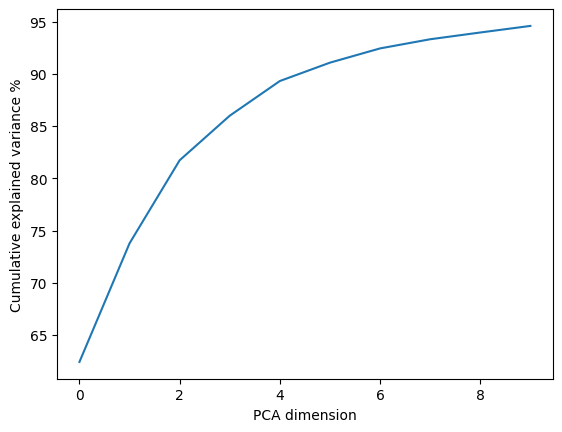

- First three: 81.72628879547119


In [6]:
analysis.pca_cumulative_explained_variance()

### Plot 2D Landscapes

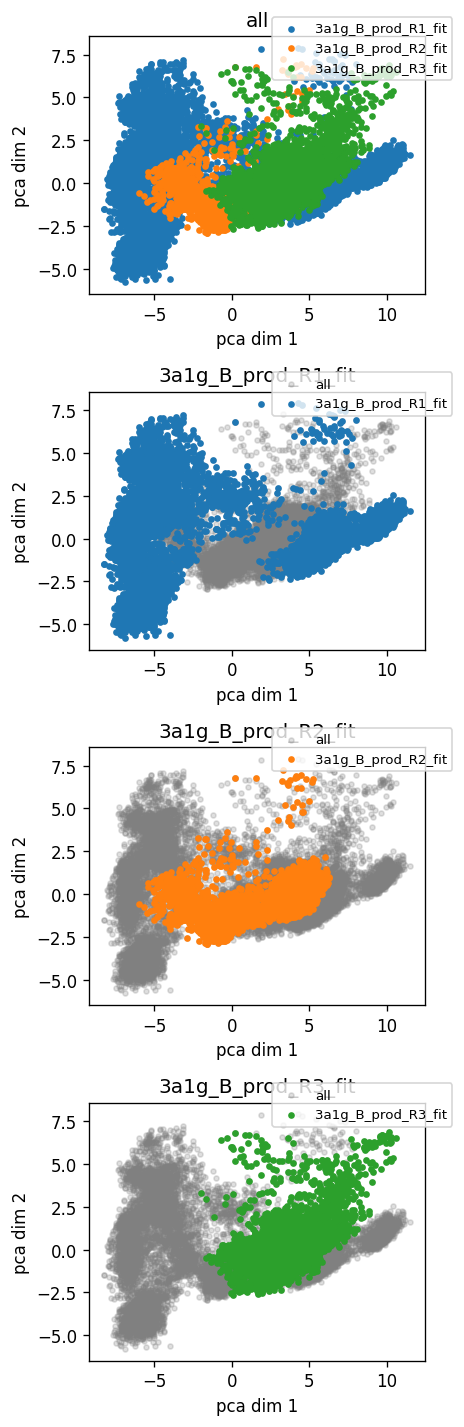

In [7]:
analysis.pca_plot_2d_landscapes()

### 1D Histograms

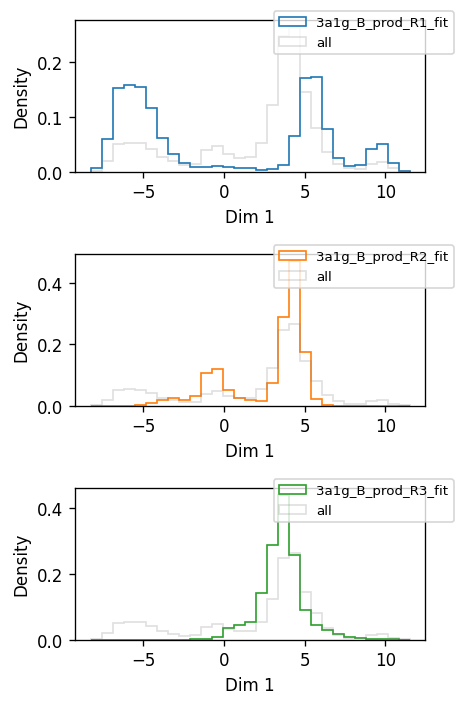

In [8]:
analysis.pca_plot_1d_histograms()

### Is PC 1 from Ca-Ca correlated with Rg? For fully intrinsically disordered proteins, this is what happens.

An hallmark of fully-disordered ensembles at a global level is the following: when you do PCA with Ca-Ca distances, typically PC dimension 1 is strongly correlated with Rg, it describes changes in chain compactness. This is what happens in Sic1 ensembles too. 

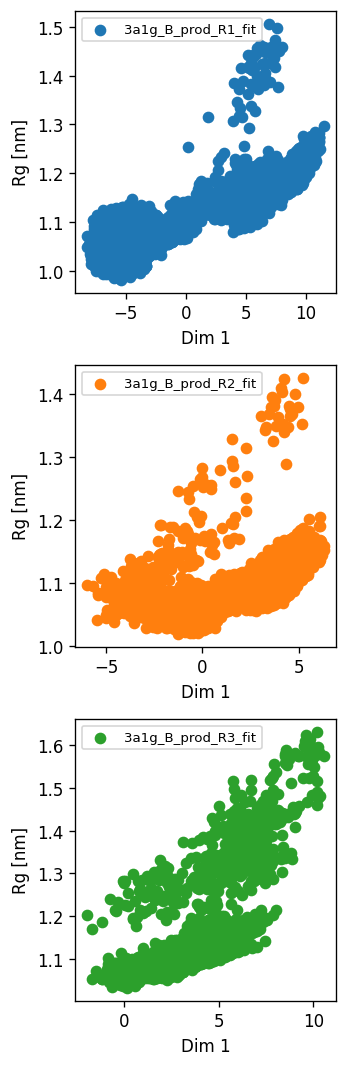

In [9]:
analysis.pca_rg_correlation()

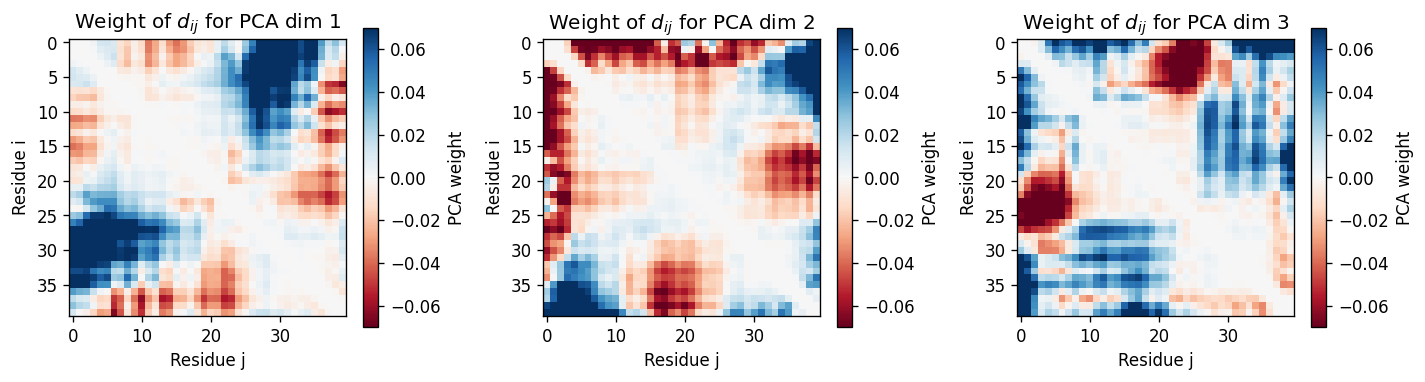

In [10]:
num_residues = 40# Number of residues in the protein.
sel_dims = [0, 1, 2]  # Dimensionality reduction feature we want to analyze
analysis.pca_correlation_plot(num_residues=num_residues, sel_dims=sel_dims)